In [1]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\grades.csv'

df = pd.read_csv(DATA)

df.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6


In [2]:
df.tail()

,grades
25,5.0
26,6.6
27,7.1
28,5.3
29,4.7


In [3]:
df.describe()

,grades
count,30.000000
mean,5.686667
std,1.318498
min,3.500000
25%,4.700000
50%,5.500000
75%,6.575000
max,8.800000


In [4]:
# "problema" com valores contínuos
df.value_counts()

grades
5.0       4
7.2       2
4.7       2
5.5       2
6.0       2
3.5       1
6.4       1
8.0       1
7.4       1
7.1       1
6.8       1
6.6       1
6.5       1
5.7       1
6.3       1
3.8       1
5.3       1
4.6       1
4.5       1
4.4       1
4.2       1
3.9       1
8.8       1
Name: count, dtype: int64

In [5]:
df['grades'].value_counts(bins=10)

(4.56, 5.09]     7
(6.15, 6.68]     4
(6.68, 7.21]     4
(3.494, 4.03]    3
(4.03, 4.56]     3
(5.09, 5.62]     3
(5.62, 6.15]     3
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

In [6]:
df['grades'].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

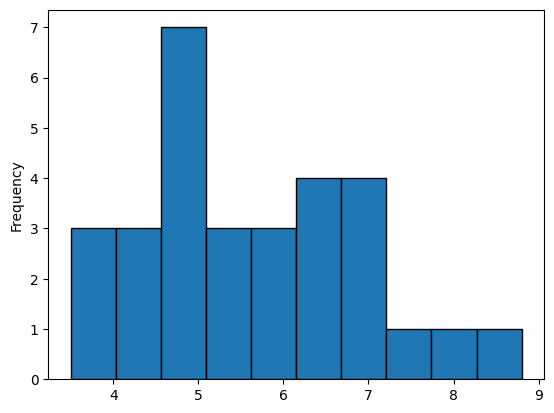

In [7]:
df['grades'].plot.hist(bins = 10, edgecolor = 'black')

In [8]:
df.shape

(30, 1)

In [9]:
import numpy as np

k = 1 + np.log2(df.shape[0])

print(k)

5.906890595608519


In [10]:
k = np.ceil(k)
k

6.0

In [11]:
amplitude = (df['grades'].max() - df['grades'].min()) / k

amplitude

0.8833333333333334

In [12]:
df['grades'].value_counts(bins= int(k)).sort_index()

(3.494, 4.383]    4
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

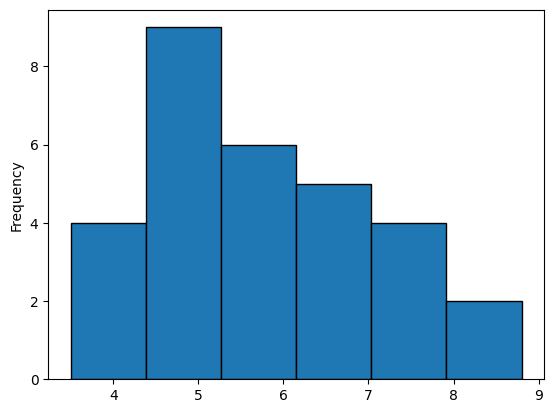

In [13]:
df['grades'].plot.hist(bins = int(k), edgecolor = 'black')

In [14]:
bins = np.histogram_bin_edges(df['grades'], bins = 'sturges')

bins

array([3.5       , 4.38333333, 5.26666667, 6.15      , 7.03333333,
       7.91666667, 8.8       ])

In [15]:
tamanho_intervalo = bins[1:] - bins[:-1]

tamanho_intervalo

array([0.88333333, 0.88333333, 0.88333333, 0.88333333, 0.88333333,
       0.88333333])

In [18]:
pd.cut(df['grades'], bins = bins).value_counts().sort_index()

grades
(3.5, 4.383]      3
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

In [19]:
pd.cut(df['grades'], bins = bins, include_lowest=True).value_counts().sort_index()

grades
(3.499, 4.383]    4
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

In [21]:
tamanho_intervalo_inteiro = np.zeros(len(bins))

tamanho_intervalo_inteiro

array([0., 0., 0., 0., 0., 0., 0.])

In [22]:
tamanho_intervalo_inteiro[1:] = np.ceil(tamanho_intervalo)

tamanho_intervalo_inteiro

array([0., 1., 1., 1., 1., 1., 1.])

In [23]:
np.cumsum(tamanho_intervalo_inteiro)

array([0., 1., 2., 3., 4., 5., 6.])

In [24]:
bins[0]

3.5

In [25]:
bins_arredondados = bins[0] + np.cumsum(tamanho_intervalo_inteiro)

bins_arredondados

array([3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [26]:
pd.cut(df['grades'], bins = bins_arredondados, include_lowest=True).value_counts().sort_index()

grades
(3.499, 4.5]     6
(4.5, 5.5]      10
(5.5, 6.5]       6
(6.5, 7.5]       6
(7.5, 8.5]       1
(8.5, 9.5]       1
Name: count, dtype: int64

In [27]:
pd.cut(df['grades'], bins = bins_arredondados, include_lowest=True, right = False).value_counts().sort_index()


grades
[3.5, 4.5)    5
[4.5, 5.5)    9
[5.5, 6.5)    7
[6.5, 7.5)    7
[7.5, 8.5)    1
[8.5, 9.5)    1
Name: count, dtype: int64

In [29]:
df_notas = pd.cut(
    df['grades'], bins = bins_arredondados, include_lowest=True, right = False
).value_counts().sort_index().to_frame()

df_notas


,count
grades,
"[3.5, 4.5)",5
"[4.5, 5.5)",9
"[5.5, 6.5)",7
"[6.5, 7.5)",7
"[7.5, 8.5)",1
"[8.5, 9.5)",1
